In [ ]:
# # EXPERIMENTING WIT LAGGING THIS IS FOR FEATURE ENGINEERING 
# # Create a lagged version of the El Niño dataset, shifting by 3 months (90 days)
# df_nino_lagged = nino_indices_df.with_columns((pl.col('time') + pl.duration(days=90)).alias('time_lagged'))

In [ ]:
# df_nino_lagged = df_nino_lagged.with_columns(
#     pl.col('time_lagged').dt.date().alias('time_lagged')
# )

In [ ]:
output_file_path = '/workspace/soil-ml-modeling-pipeline/ml-modeling-pipeline/data/02_intermediate/preprocessed_nino_data.parquet'
df_nino_lagged.write_parquet(output_file_path)

In [ ]:
# Load meteorlogical data from NASA
df_nino_lagged = pl.read_parquet("/workspace/soil-ml-modeling-pipeline/ml-modeling-pipeline/data/02_intermediate/preprocessed_nino_data.parquet")

In [36]:
import pandas as pd

df = pd.read_parquet("/teamspace/studios/this_studio/ml-drought-forecasting/ml-modeling-pipeline/data/03_primary/preprocessed_data.parquet")

In [37]:
df 

,lat,lon,time,PRECTOTCORR,T2M,T2M_MAX,T2M_MIN,TS,PS,WS2M,...,eddi_09mn,eddi_12mn,Nino12_lag6m,Nino3_lag6m,Nino34_lag6m,Nino4_lag6m,WTIO_lag3m,SETIO_lag3m,DMI_lag3m,SWIO_lag3m
0,-4.5,36.875,1981-09-06,1.968974e-06,293.579241,301.492188,287.536830,296.363839,88202.205357,4.453125,...,-2.158474,-2.158474,-0.477185,-0.228789,-0.218690,-0.044586,-0.509883,-0.169278,-0.340605,-0.895850
1,-4.5,37.500,1981-09-06,2.893012e-06,294.168527,301.609375,288.626116,296.686384,90877.446429,3.647321,...,-2.158474,-2.158474,-0.477185,-0.228789,-0.218690,-0.044586,-0.509883,-0.169278,-0.340605,-0.895850
2,-4.5,38.125,1981-09-06,5.896145e-06,293.935268,301.243304,288.411830,295.907366,92061.669643,2.674107,...,-2.158474,-2.158474,-0.477185,-0.228789,-0.218690,-0.044586,-0.509883,-0.169278,-0.340605,-0.895850
3,-4.5,38.750,1981-09-06,7.132334e-06,295.993304,302.422991,291.340402,297.543527,96825.875000,3.242188,...,-2.158474,-2.158474,-0.477185,-0.228789,-0.218690,-0.044586,-0.509883,-0.169278,-0.340605,-0.895850
4,-4.5,39.375,1981-09-06,6.611135e-06,298.103795,301.303571,295.662946,299.334821,100592.392857,4.148438,...,-2.158474,-2.158474,-0.477185,-0.228789,-0.218690,-0.044586,-0.509883,-0.169278,-0.340605,-0.895850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650455,22.0,33.125,2024-04-28,0.000000e+00,302.765625,311.246094,295.191406,304.777344,97286.125000,4.527344,...,1.555058,1.781517,0.823549,0.502674,0.727512,0.946172,0.919592,0.521135,0.398457,0.230374
3650456,22.0,34.375,2024-04-28,0.000000e+00,304.261719,312.601562,296.281250,307.757812,95978.781250,2.867188,...,1.388280,1.555058,0.823549,0.502674,0.727512,0.946172,0.919592,0.521135,0.398457,0.230374
3650457,22.0,35.000,2024-04-28,7.799827e-09,302.746094,311.351562,295.351562,306.960938,93670.812500,2.500000,...,1.253060,1.555058,0.823549,0.502674,0.727512,0.946172,0.919592,0.521135,0.398457,0.230374
3650458,22.0,35.625,2024-04-28,3.121095e-07,301.171875,310.257812,294.105469,305.843750,93352.125000,3.406250,...,1.195284,1.555058,0.823549,0.502674,0.727512,0.946172,0.919592,0.521135,0.398457,0.230374


In [38]:
# Assuming your DataFrame is named 'df'
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Resample to monthly frequency and aggregate by mean (or another method)
df = df.resample('ME').mean()

df.reset_index(inplace=True)

In [39]:
df 

,time,lat,lon,PRECTOTCORR,T2M,T2M_MAX,T2M_MIN,TS,PS,WS2M,...,eddi_09mn,eddi_12mn,Nino12_lag6m,Nino3_lag6m,Nino34_lag6m,Nino4_lag6m,WTIO_lag3m,SETIO_lag3m,DMI_lag3m,SWIO_lag3m
0,1981-09-30,7.790125,35.120396,0.000035,298.709222,304.882408,293.248694,300.090898,92565.740131,2.684282,...,-1.150191,-0.900076,-0.590689,-0.333515,-0.328001,-0.211338,-0.518459,-0.124096,-0.394363,-0.714189
1,1981-10-31,7.370122,35.121189,0.000019,298.407501,304.991489,292.694493,299.665036,92537.033504,2.646849,...,-1.214278,-0.968536,-0.730760,-0.101760,-0.121694,0.003076,-0.188282,0.086195,-0.274477,-0.962626
2,1981-11-30,7.370122,35.121189,0.000012,296.408103,303.687458,290.260331,297.522065,92579.709928,2.905859,...,-1.154919,-1.017332,-0.431538,-0.398716,-0.401087,-0.053461,-0.529386,-0.332198,-0.197189,-0.450035
3,1981-12-31,7.370122,35.121189,0.000013,296.116865,303.676903,289.893450,297.133823,92597.461898,2.889616,...,-1.041884,-1.151755,-0.057720,-0.135460,-0.322992,-0.176099,-0.600241,-0.313011,-0.287231,-0.376689
4,1982-01-31,7.370122,35.121189,0.000020,296.094361,303.277073,290.098676,297.268485,92526.858268,2.911867,...,-1.008683,-1.247141,-0.212096,0.098848,0.009637,-0.200902,-0.538837,-0.536164,-0.002673,-0.278278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2023-12-31,7.370122,35.121189,0.000017,296.035069,303.002973,290.218891,296.859334,92692.132600,2.415835,...,0.471616,0.728922,1.287050,2.116340,2.073925,1.576565,1.142302,0.224570,0.917732,0.182478
508,2024-01-31,7.370122,35.121189,0.000022,295.919242,302.983418,289.984529,297.062582,92772.590938,2.691682,...,0.446595,0.631567,0.941825,1.799033,1.710938,1.539318,1.191167,0.473504,0.717663,0.304637
509,2024-02-29,7.370122,35.121189,0.000022,297.974641,305.320362,291.674127,299.389510,92656.348316,2.836118,...,0.448728,0.546622,1.219509,1.444086,1.472819,1.271462,1.157165,0.869069,0.288096,0.077474
510,2024-03-31,7.370122,35.121189,0.000040,299.816927,306.860152,293.601018,301.365978,92535.746802,2.781255,...,0.545337,0.522526,0.483307,1.108234,1.270905,1.001546,0.871851,0.300307,0.571545,0.442707


In [40]:
# List of important features
important_features = [
    'Nino12_lag6m', 'Nino3_lag6m', 'Nino34_lag6m', 'Nino4_lag6m',
    'WTIO_lag3m', 'SETIO_lag3m', 'DMI_lag3m', 'SWIO_lag3m'
]

In [41]:
# Define lags
lags = [1, 3, 6, 12]

# Create lag features
for var in important_features:
    for lag in lags:
        df[f"{var}_lag{lag}"] = df.groupby(['lat', 'lon'])[var].shift(lag)


[0]	train-rmse:0.47887	eval-rmse:0.49416
[50]	train-rmse:0.01594	eval-rmse:0.10876


[100]	train-rmse:0.00298	eval-rmse:0.10733
[150]	train-rmse:0.00070	eval-rmse:0.10720
[179]	train-rmse:0.00042	eval-rmse:0.10720
MSE: 0.01149208378046751, R^2: 0.9604935804867304
               Feature  Importance
35           eddi_09mn    1.688789
23                U50M    0.043472
37         Nino3_lag6m    0.027909
47  Nino12_lag6m_lag12    0.023863
67   SETIO_lag3m_lag12    0.023777
63    WTIO_lag3m_lag12    0.021389
51   Nino3_lag6m_lag12    0.019173
40          WTIO_lag3m    0.013292
42           DMI_lag3m    0.013028
39         Nino4_lag6m    0.012720


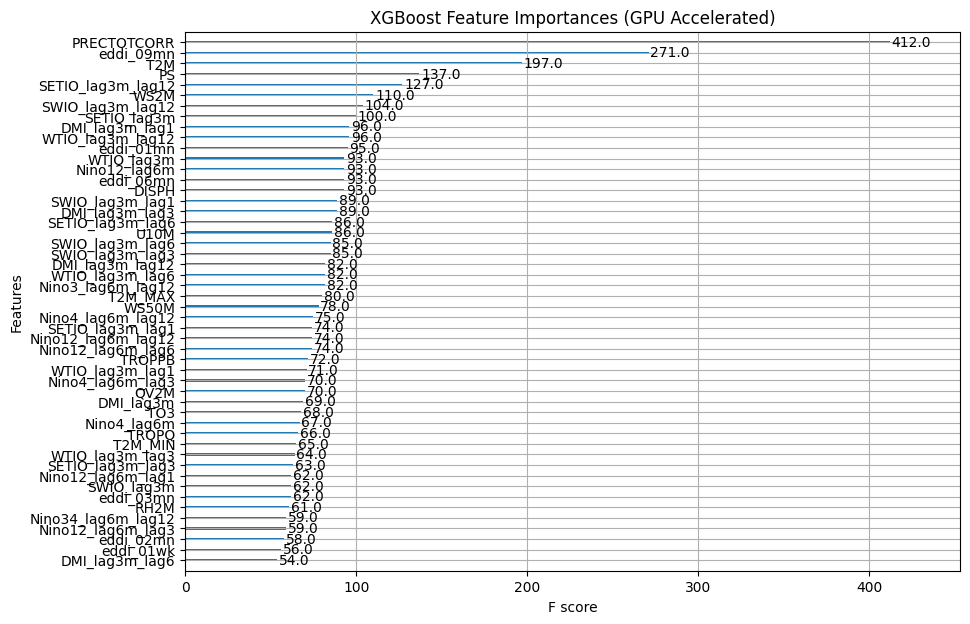

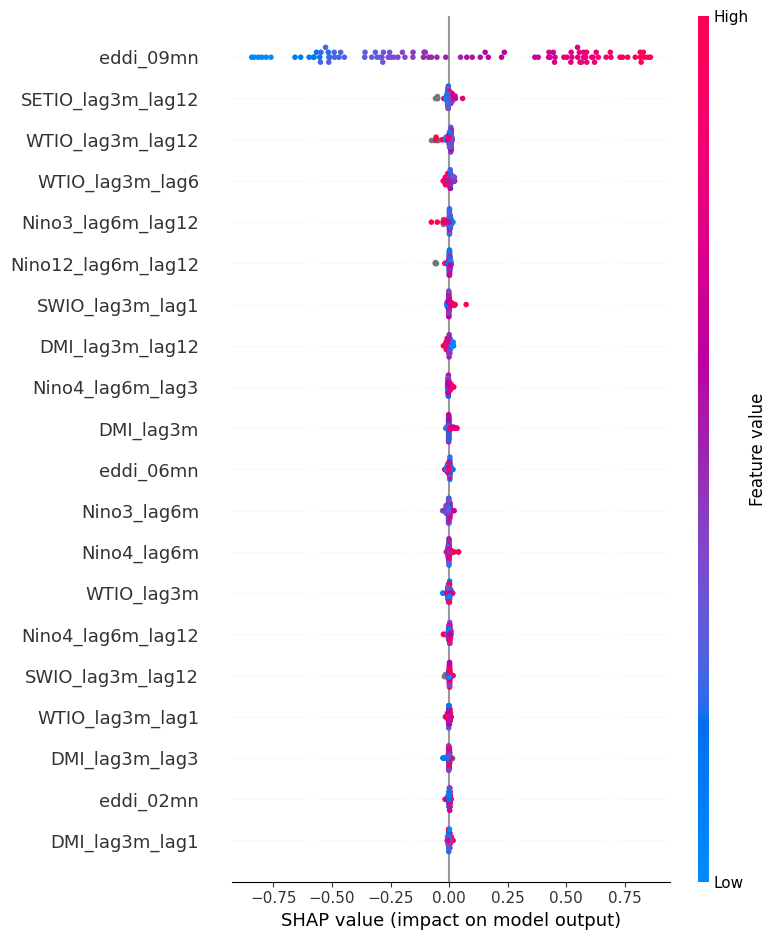

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Prepare the data
feature_columns = df.columns.drop(['eddi_12mn', 'time', 'lat', 'lon'])
X = df[feature_columns].copy()  # Explicitly create a copy
y = df['eddi_12mn']

# Downcast data types
for col in X.select_dtypes(include=['float64', 'int64']).columns:
    X[col] = pd.to_numeric(X[col], downcast='float')

# Proceed with splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Initialize and apply the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled, columns=X_test.columns, index=X_test.index
)

# Create DMatrix for XGBoost with scaled data and feature names
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set up parameters for XGBoost with updated GPU settings
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'tree_method': 'hist',  # Use 'hist' instead of 'gpu_hist'
    'device': 'cuda',       # Specify GPU device
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'random_state': 42
}

# Train the model
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=20,
    evals=evals,
    verbose_eval=50
)

# Evaluate the model
y_pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R^2: {r2}')

# Extract feature importances
importance_dict = xgb_model.get_score(importance_type='gain')
importances = pd.DataFrame({
    'Feature': importance_dict.keys(),
    'Importance': importance_dict.values()
})
importances.sort_values(by='Importance', ascending=False, inplace=True)
print(importances.head(10))

# Plot feature importances
plt.rcParams['figure.figsize'] = [10, 7]
ax = xgb.plot_importance(xgb_model, max_num_features=50)
plt.title('XGBoost Feature Importances (GPU Accelerated)')
plt.show()

# Compute SHAP values
explainer = shap.TreeExplainer(xgb_model)
X_test_sample = X_test_scaled.sample(n=100, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns)
